In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import bats

In [2]:
import hera_tda as hera
import hera_tda.bottleneck

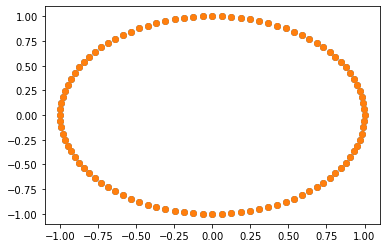

In [3]:
n = 100
p = 4
sigma = 0.05
thetas = np.arange(0, n) * 2 * np.pi / n
rs = np.ones(n)
X = np.hstack(((rs * np.cos(thetas)).reshape(-1,1), (rs * np.sin(thetas)).reshape(-1,1), sigma*np.random.randn(n, p-2)))
plt.scatter(X[:,0], X[:,1])

Y = np.hstack(((rs * np.cos(thetas)).reshape(-1,1), (rs * np.sin(thetas)).reshape(-1,1), sigma*np.random.randn(n, p-2)))
plt.scatter(Y[:,0], Y[:,1])

In [4]:
FX = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(X)), bats.Euclidean(), np.inf, 2)
FY = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(Y)), bats.Euclidean(), np.inf, 2)

In [5]:
RX = bats.reduce(FX, bats.F2(), bats.standard_reduction_flag(), bats.clearing_flag())
RY = bats.reduce(FY, bats.F2(), bats.standard_reduction_flag(), bats.clearing_flag())

In [6]:
dim = 0
pX = RX.persistence_pairs(dim)
pY = RY.persistence_pairs(dim)

returns the distance as well as the indices matched in the longest edge

In [26]:
t0 = time.monotonic()
d, inds = hera.bottleneck.BottleneckDistance(pX, pY)
t1 = time.monotonic()
print("exact: ", t1 - t0, "sec.")
print("\tdist = ", d)

t0 = time.monotonic()
d, inds = hera.bottleneck.BottleneckDistanceApprox(pX, pY,0.001)
t1 = time.monotonic()
print("approx: ", t1 - t0, "sec.")
print("\tdist = ", d)

exact:  0.02781778998905793 sec.
	dist =  0.012765647103995276
approx:  0.012157742006820627 sec.
	dist =  0.012774122542758354


Comparsion vs. persim

In [27]:
import persim

In [35]:
p1 = hera.bottleneck.Pairs(pX)
p2 = hera.bottleneck.Pairs(pY)
t0 = time.monotonic()
d, match = persim.bottleneck(p1, p2, matching=True)
t1 = time.monotonic()
print("persim: ", t1 - t0, "sec.")
print("\tdist = ", d)

persim:  0.32068716500361916 sec.
	dist =  0.012765647103995276


In [30]:
a = [bats.PersistencePair(0,0,1,0.0,1.0), bats.PersistencePair(0,0,1,0.0,1.0)]

In [31]:
hera.bottleneck.Pairs(a)

[(0.0, 1.0), (0.0, 1.0)]

In [32]:
hera.bottleneck.BottleneckDistance(a,a)

(0.0, (-1, -1))